In [ ]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('always')

In [ ]:
# Importación librerías
import pandas as pd
import numpy as np

In [ ]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTest_carListings.zip', index_col=0)

In [ ]:
# Visualización datos de entrenamiento
dataTraining.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


Dataset

Los automóviles tienen un precio inicial establecido por el fabricante, a medida que estos vehículos envejecen y se venden como usados, su valor se determina por la oferta y la demanda, así como por su historial único. Cuanto más se diferencien estos autos de otros similares, más difícil será evaluar su precio utilizando métodos tradicionales. Sin embargo, el uso de algoritmos de aprendizaje automático puede ayudarnos a evaluar con mayor precisión el valor de un vehículo al considerar todas las características:



Price: precio del vehiculo usado

Year: año de fabricacion, salida al mercado

Mileage: millas recorridas (kilometraje)

Make: marca del fabricante

Model: modelo de vehiculo


In [ ]:
#verificacion de datos faltantes
valores_nulos_por_columna = dataTraining.isnull().sum()
valores_nulos_por_columna

Price      0
Year       0
Mileage    0
State      0
Make       0
Model      0
dtype: int64

No se registran datos faltantes

In [ ]:
# tipos de datos


tipos=dataTraining.dtypes
print(tipos)

Price       int64
Year        int64
Mileage     int64
State      object
Make       object
Model      object
dtype: object


Se tienen 3 caracteristicas numericas y 3 categoricas, verifiquemos la cantidad de clases de cada categoria:

In [ ]:
#conteo de datos categoricos:
#conteo de categorias en la variable Class
conteostate = dataTraining['State'].value_counts()

display(conteostate)
len(conteostate)

State
 TX    45918
 CA    36534
 FL    33759
 GA    18182
 NC    17930
 IL    16793
 VA    15894
 PA    13039
 NY    12447
 NJ    12132
 OH    11364
 WA    10900
 CO    10875
 AZ    10749
 TN     9274
 MA     8586
 MD     8245
 MO     8029
 IN     7850
 KY     6688
 AL     6283
 WI     5614
 MN     5415
 MI     5327
 OK     5096
 CT     4942
 OR     4907
 UT     4854
 SC     4815
 LA     3847
 KS     3704
 NV     3332
 AR     3128
 MS     3043
 NH     2744
 NE     2522
 IA     2325
 NM     2280
 ID     1736
 DE     1221
 HI     1181
 MT      997
 ME      965
 RI      833
 AK      813
 ND      681
 WV      666
 SD      621
 VT      579
 WY      335
 DC        6
Name: count, dtype: int64

51

Los Estados Unidos tienen 50 estados, 1 distrito federal, 5 territorios importantes, y 9 territorios menores, el anterior listado hace referencia a sus 50 estados y su distrito federal.

In [ ]:
#conteo de datos categoricos:

conteoMake = dataTraining['Make'].value_counts()

display(conteoMake)
len(conteoMake)

Make
Ford             62899
Chevrolet        58383
Toyota           45941
Honda            33191
Jeep             24369
GMC              20834
Kia              16352
Dodge            16159
Hyundai          15057
Lexus            13664
BMW              12326
Volkswagen       11110
Nissan           10569
Chrysler          9046
Mercedes-Benz     7575
Subaru            6791
Cadillac          5414
Buick             4842
Ram               3611
MINI              2766
Land              2713
INFINITI          2406
Acura             2403
Mazda             2332
Lincoln           1786
Volvo             1710
Audi              1423
Mitsubishi        1272
Porsche            980
Scion              651
Jaguar             324
Pontiac            308
FIAT               272
Mercury            271
Tesla              148
Bentley             57
Suzuki              38
Freightliner         7
Name: count, dtype: int64

38

Son 38 diferentes marcas o fabricantes del vehiculo

In [ ]:
#conteo de datos categoricos:

conteoModel = dataTraining['Model'].value_counts()

display(conteoModel)
len(conteoModel)

Model
Silverado          18085
Grand              12344
Sierra              8409
Accord              7357
F-1504WD            6684
                   ...  
PathfinderSE          53
Galant4dr             53
SLK-ClassSLK350       52
Monte                 48
RX-84dr               48
Name: count, Length: 525, dtype: int64

525

Existen 525 diferentes tipos de modelos de vehiculos

Para tratar estos datos se realizara dummy y se eliminaran las variables categoricas originales, en total quedaran 617 variables binarias para dataTraining donde 1 quiere decir que si pertenece y cero que no. tambien, se tratara igual en conjunto de test.

In [ ]:
#dummies
dataTraining = dataTraining.join(pd.get_dummies(dataTraining['Model'], prefix='M'))
dataTesting = dataTesting.join(pd.get_dummies(dataTesting['Model'], prefix='M'))
dataTraining = dataTraining.join(pd.get_dummies(dataTraining['Make'], prefix='K'))
dataTesting = dataTesting.join(pd.get_dummies(dataTesting['Make'], prefix='K'))
dataTraining = dataTraining.join(pd.get_dummies(dataTraining['State'], prefix='S'))
dataTesting = dataTesting.join(pd.get_dummies(dataTesting['State'], prefix='S'))
dataTraining = dataTraining.drop(['Model'], axis=1)
dataTesting = dataTesting.drop(['Model'], axis=1)
dataTraining = dataTraining.drop(['Make'], axis=1)
dataTesting = dataTesting.drop(['Make'], axis=1)
dataTraining = dataTraining.drop(['State'], axis=1)
dataTesting = dataTesting.drop(['State'], axis=1)

In [ ]:
dataTraining.head()

,Price,Year,Mileage,M_1,M_15002WD,M_15004WD,M_1500Laramie,M_1500Tradesman,M_200LX,M_200Limited,...,S_ SD,S_ TN,S_ TX,S_ UT,S_ VA,S_ VT,S_ WA,S_ WI,S_ WV,S_ WY
0,34995,2017,9913,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,37895,2015,20578,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,18430,2012,83716,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,24681,2014,28729,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,26998,2013,64032,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Binaria
dataTraining = dataTraining.astype(int)
dataTesting= dataTesting.astype(int)
display(dataTraining.head())
display(dataTesting.head())

,Price,Year,Mileage,M_1,M_15002WD,M_15004WD,M_1500Laramie,M_1500Tradesman,M_200LX,M_200Limited,...,S_ SD,S_ TN,S_ TX,S_ UT,S_ VA,S_ VT,S_ WA,S_ WI,S_ WV,S_ WY
0,34995,2017,9913,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,37895,2015,20578,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18430,2012,83716,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,24681,2014,28729,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26998,2013,64032,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,Year,Mileage,M_1,M_15002WD,M_15004WD,M_1500Laramie,M_1500Tradesman,M_200LX,M_200Limited,M_200S,...,S_ SD,S_ TN,S_ TX,S_ UT,S_ VA,S_ VT,S_ WA,S_ WI,S_ WV,S_ WY
ID,,,,,,,,,,,,,,,,,,,,,
0,2014,31909,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,5362,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014,50300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2004,132160,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2015,25226,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Se nota que una diferencia de 2 entre entrentamiento y test cuando deberia ser solo una, el precio, se procede a verificar:

In [ ]:
#comparativo

columnasTr=dataTraining.columns
columnasTs=dataTesting.columns

columnas_no_encontradas = []

for columna in columnasTr:
    if columna not in columnasTs:
        columnas_no_encontradas.append(columna)

print("Columnas en dataTraining que no están en dataTesting:")
print(columnas_no_encontradas)

Columnas en dataTraining que no están en dataTesting:
['Price', 'K_Freightliner']


A este punto en pro de mantener la consistencia entre dataTraining y dataTesting se eliminará la columna "K_Freightliner" del conjunto de entrenamiento

In [ ]:
dataTraining = dataTraining.drop(['K_Freightliner'], axis=1)
dataTraining

,Price,Year,Mileage,M_1,M_15002WD,M_15004WD,M_1500Laramie,M_1500Tradesman,M_200LX,M_200Limited,...,S_ SD,S_ TN,S_ TX,S_ UT,S_ VA,S_ VT,S_ WA,S_ WI,S_ WV,S_ WY
0,34995,2017,9913,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,37895,2015,20578,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18430,2012,83716,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,24681,2014,28729,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26998,2013,64032,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,29900,2015,25287,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
399996,17688,2015,17677,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399997,24907,2014,66688,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399998,11498,2014,37872,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#eliminacion de caracteres problematicos en el nombre de las columans

import re

# función para limpiar los nombres de las columnas
def limpia_columna_nom(column_name):
    # Reemplazar todos los caracteres no alfanuméricos con un guión bajo
    return re.sub(r'\W', '_', column_name)

# aplicar la función a cada nombre de columna en dataTraining
dataTraining.columns = [limpia_columna_nom(col) for col in dataTraining.columns]
display(dataTraining.head())

dataTraining.head()


# aplicar la función a cada nombre de columna en dataTraining
dataTesting.columns = [limpia_columna_nom(col) for col in dataTesting.columns]
display(dataTesting.head())

,Price,Year,Mileage,M_1,M_15002WD,M_15004WD,M_1500Laramie,M_1500Tradesman,M_200LX,M_200Limited,...,S__SD,S__TN,S__TX,S__UT,S__VA,S__VT,S__WA,S__WI,S__WV,S__WY
0,34995,2017,9913,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,37895,2015,20578,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18430,2012,83716,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,24681,2014,28729,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26998,2013,64032,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,Year,Mileage,M_1,M_15002WD,M_15004WD,M_1500Laramie,M_1500Tradesman,M_200LX,M_200Limited,M_200S,...,S__SD,S__TN,S__TX,S__UT,S__VA,S__VT,S__WA,S__WI,S__WV,S__WY
ID,,,,,,,,,,,,,,,,,,,,,
0,2014,31909,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,5362,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014,50300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2004,132160,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2015,25226,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Division de de datos en conjunto de entrenamiento y prueba, asi como predictores y variables objetivo

In [ ]:
# Separación de variables predictoras (X) y variable de interés (y)
y = dataTraining['Price']
X = dataTraining.drop(['Price'], axis=1)

In [ ]:
# descripcion del entrenamiento X
import pandas as pd
#formato de numero
pd.set_option('display.float_format', '{:.2f}'.format)

X.describe()

,Year,Mileage,M_1,M_15002WD,M_15004WD,M_1500Laramie,M_1500Tradesman,M_200LX,M_200Limited,M_200S,...,S__SD,S__TN,S__TX,S__UT,S__VA,S__VT,S__WA,S__WI,S__WV,S__WY
count,400000.00,400000.00,400000.00,400000.00,400000.00,400000.00,400000.00,400000.00,400000.00,400000.00,...,400000.00,400000.00,400000.00,400000.00,400000.00,400000.00,400000.00,400000.00,400000.00,400000.00
mean,2013.20,55072.96,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,...,0.00,0.02,0.11,0.01,0.04,0.00,0.03,0.01,0.00,0.00
std,3.29,40881.02,0.02,0.03,0.05,0.03,0.02,0.02,0.07,0.04,...,0.04,0.15,0.32,0.11,0.20,0.04,0.16,0.12,0.04,0.03
min,1997.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2012.00,25841.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2014.00,42955.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,2016.00,77433.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,2018.00,2457832.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Existen 400 mil observaciones y 615 columnas

Year: los autos en el conjunto de datos varían desde 1997 hasta 2018, el año promedio de fabricación es aproximadamente 2013, la distribución parece bastante normal, ya que la media y la mediana (50%) son cercanas, la desviación estándar es de alrededor de 3.29 años, lo que indica que la mayoría de los autos se encuentran dentro de un rango de 3 años desde la media.

Mileage: la distancia promedio recorrida es de aproximadamente 55000 millas (kilometraje del vehiculo), pero hay una gran variabilidad, como lo indica la desviación estándar de aproximadamente 40881 millas, también hay un valor máximo muy alto de más de 2 millones de millas y podria catalogarse como dato atipico, se permitira que los modelos le den manejo a este tipo de datos.

In [ ]:
y.describe()

count   400000.00
mean     21146.92
std      10753.66
min       5001.00
25%      13499.00
50%      18450.00
75%      26999.00
max      79999.00
Name: Price, dtype: float64

El total de observaciones es 400 mil, el precio medio de los vehículos es de aproximadamente 21146,92

la desviacion estadar es de 10753,66, lo que sugiere que hay una variabilidad considerable en los precios de los vehículos

el precio mínimo es de 5001 y el maximo de 79999, la mitad de los vehículos tienen un precio de $18450 o menos.



In [ ]:
#division
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
display(X_train.shape)
display(y_test.shape)

(268000, 616)

(132000,)

los datos quedan dividos en 268000 para entrenamiento y 132000 para prueba

Se iniciara una prueba con variables transformadas y otra con variables originales para ver el comportamiento de los datos y la prediccion.

In [ ]:
#PCA


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pca_pipeline = make_pipeline(StandardScaler(), PCA(n_components=0.97)) # Conservar el 97% de varianza

# ajustar y transformar los datos de entrenamiento
XTrain_pca = pca_pipeline.fit_transform(X_train)

# transformar los datos de prueba
XTest_pca = pca_pipeline.transform(X_test)

# obtener el numero de componentes
n_components = pca_pipeline.named_steps['pca'].n_components_

print(f"Número de componentes seleccionados para conservar el 97% de la varianza: {n_components}")
print(f"Forma de los datos de entrenamiento después de PCA: {XTrain_pca.shape}")
print(f"Forma de los datos de prueba después de PCA: {XTest_pca.shape}")

Número de componentes seleccionados para conservar el 97% de la varianza: 558
Forma de los datos de entrenamiento después de PCA: (268000, 558)
Forma de los datos de prueba después de PCA: (132000, 558)


In [ ]:
# linear regresion con datos tranformados  PCA

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Entrenar el modelo de regresión lineal
regressor = LinearRegression()
regressor.fit(XTrain_pca, y_train)

# Realizar predicciones en el conjunto de prueba
yPred = regressor.predict(XTest_pca)

# Calcular el Mean Squared Error (MSE)
mse = mean_squared_error(y_test, yPred)
print(f"Mean Squared Error (MSE): {mse}")

# Calcular el Root Mean Squared Error (RMSE)
rmse = sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 43504406.61292842
Root Mean Squared Error (RMSE): 6595.787035140569


In [ ]:
# linear regresion con datos originales solo binarizacion de variables categoricas

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Entrenar el modelo de regresión lineal
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
yPred = regressor.predict(X_test)

# Calcular el Mean Squared Error (MSE)
mse = mean_squared_error(y_test, yPred)
print(f"Mean Squared Error (MSE): {mse}")

# Calcular el Root Mean Squared Error (RMSE)
rmse = sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 19156359.139841553
Root Mean Squared Error (RMSE): 4376.7978180219325


hasta este punto los datos datos originales (solo binarizacion de variables categoricas) tienen un mejor comportamiento en la prediccion. se procede con Random Forest

In [ ]:

#Random forest base con tranformacion y PCA

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score



# crear el modelo Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=0, n_jobs=-1)

#  entrenamiento
rf_regressor.fit(X_train_scaled, y_train)

# hacer predicciones con los datos de prueba
y_pred_rf = rf_regressor.predict(X_test_scaled)

# calcular MSE, RMSE y MAE
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rfreg = sqrt(mse_rf)
mae_rfreg  = mean_absolute_error(y_test, y_pred_rf)
r2_rfreg = r2_score(y_test, y_pred_rf)
print(f'Mean Absolute Error (MAE) with Random Forest: {mae_rfreg}')
print(f'Root Mean Squared Error (RMSE) with Random Forest: {rmse_rfreg}')
print(f'R Cuadrado (R2) with Random Forest: {r2_rfreg}')

Mean Absolute Error (MAE) with Random Forest: 2342.0370224661906
Root Mean Squared Error (RMSE) with Random Forest: 3759.3648597765136
R Cuadrado (R2) with Random Forest: 0.8771585197662753


In [ ]:
#Random forest datos originales solo binarizacion


rf_regressor = RandomForestRegressor(random_state=0, n_jobs=-1)

#  entrenamiento
rf_regressor.fit(X_train, y_train)

# hacer predicciones con los datos de prueba
y_pred_rf = rf_regressor.predict(X_test)

# calcular MSE, RMSE y MAE
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rfreg = sqrt(mse_rf)
mae_rfreg  = mean_absolute_error(y_test, y_pred_rf)
r2_rfreg = r2_score(y_test, y_pred_rf)
print(f'Mean Absolute Error (MAE) with Random Forest: {mae_rfreg}')
print(f'Root Mean Squared Error (RMSE) with Random Forest: {rmse_rfreg}')
print(f'R Cuadrado (R2) with Random Forest: {r2_rfreg}')

Mean Absolute Error (MAE) with Random Forest: 2342.1906925783583
Root Mean Squared Error (RMSE) with Random Forest: 3758.7676390044476
R Cuadrado (R2) with Random Forest: 0.877197546388624


para este caso, parece que las características que se eliminaron al aplicar PCA tenían información relevante para predecir el precio del vehiculo

La reducción de dimensionalidad puede ser muy útil cuando se enfrentan problemas de alta dimensionalidad o el "curse of dimensionality", pero si los modelos pueden manejar eficientemente la dimensionalidad alta y extraer patrones útiles de todas las variables, como parece ser el caso, entonces es lógico preferir trabajar con todos los datos originales para mejorar el rendimiento del modelo en la competencia. Además, la capacidad de los modelos modernos de aprendizaje automático para manejar un gran número de características sin necesidad de reducción previa es cada vez más avanzada, lo que puede hacer que técnicas como PCA o PLS sean menos necesarias en algunos contextos. Dado lo anterior como es una competencia y el RMSE mas bajo sera el ganador a partir de este punto se trabajara con los datos oriniales sin transformar y se eligira el mejor modelo que sepa ajustarse a la situacion.

Por otro lado, los modelos como los árboles de decisión, los bosques aleatorios y los métodos basados en gradient boosting no requieren necesariamente de un escalamiento de los datos, ya que su estructura de decisión basada en umbrales no se ve afectada por la magnitud de las características. En estos casos, escalar los datos no mejora el rendimiento y, en algunas situaciones, podría incluso introducir cierta pérdida de precisión en la representación numérica.

Tambien,si el conjunto de datos incluye características numéricas que son codificaciones de categorías (por ejemplo, codificación one-hot), escalar estas características podría no tener sentido y podría afectar negativamente el rendimiento del modelo.

Por lo expuesto anteriormente desde este punto se trabajara con datos originales (solo binarización categorica)

____

Se procedera con calibracion por optuna del modelo XGboost

In [ ]:
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

def para(trial):
    param = {
        'objective': 'reg:squarederror',
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.0, 1.0)
    }

    modelo = xgb.XGBRegressor(**param)
    modelo.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=False)
    preds = modelo.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    return rmse

revision = optuna.create_study(direction='minimize')
revision.optimize(para, n_trials=100)

print('lo mejor:', revision.best_trial.params)

[I 2024-04-27 06:00:11,321] A new study created in memory with name: no-name-3e8ce8b6-1e23-47f6-9ea4-ce6b47069322
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-04-27 06:01:01,047] Trial 0 finished with value: 3993.3655664122266 and parameters: {'max_depth': 9, 'learning_rate': 0.09187617100131613, 'n_estimators': 274, 'subsample': 0.6614341326615689, 'colsample_bytree': 0.7496587272088036, 'min_child_weight': 4, 'gamma': 0.798699774385231}. Best is trial 0 with value: 3993.3655664122266.
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-04-27 06:09:48,198] Trial 13 finished with value: 3739.8624884687647 and parameters: {'max_depth': 8, 'learning_rate': 0.21112691478100415, 'n_estimators': 220, 'subsample': 0.7521457271891494, 'colsample_bytree': 0.5785161450899866, 'min_child_weight': 2, 'gamma': 0.7061126794321531}. Best is trial 12 with value: 3633.643342078252.
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-04-27 06:10:40,599] Trial 14 finished with value: 3627.903353992804 and parameters: {

[I 2024-04-27 06:20:27,238] Trial 26 finished with value: 3548.8423328609865 and parameters: {'max_depth': 8, 'learning_rate': 0.2982546325620441, 'n_estimators': 268, 'subsample': 0.8586146502506258, 'colsample_bytree': 0.5826343393218673, 'min_child_weight': 2, 'gamma': 0.6427358731435061}. Best is trial 25 with value: 3521.967850650295.
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-04-27 06:21:23,596] Trial 27 finished with value: 3556.2185063987627 and parameters: {'max_depth': 8, 'learning_rate': 0.29353539490480124, 'n_estimators': 271, 'subsample': 0.8519961583444118, 'colsample_bytree': 0.5949354323132119, 'min_child_weight': 2, 'gamma': 0.6172898907985274}. Best is trial 25 with value: 3521.967850650295.
C:\Users\Lenovo\AppData\Roaming\P

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-04-27 06:33:35,383] Trial 40 finished with value: 3626.0122059138153 and parameters: {'max_depth': 9, 'learning_rate': 0.18128049171781796, 'n_estimators': 288, 'subsample': 0.9956137170135724, 'colsample_bytree': 0.7093703508218898, 'min_child_weight': 1, 'gamma': 0.2002360324967013}. Best is trial 25 with value: 3521.967850650295.
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-04-27 06:34:35,030] Trial 41 finished with value: 3543.4621705120967 and parameters: 

[I 2024-04-27 06:45:56,950] Trial 53 finished with value: 3481.350193725297 and parameters: {'max_depth': 10, 'learning_rate': 0.28369296760790164, 'n_estimators': 298, 'subsample': 0.8303857536526094, 'colsample_bytree': 0.7424532005257644, 'min_child_weight': 10, 'gamma': 0.5812544072345996}. Best is trial 50 with value: 3477.791917384891.
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-04-27 06:46:53,276] Trial 54 finished with value: 3482.504786527054 and parameters: {'max_depth': 10, 'learning_rate': 0.28368344143054525, 'n_estimators': 300, 'subsample': 0.8396847944340754, 'colsample_bytree': 0.7438241259237726, 'min_child_weight': 10, 'gamma': 0.5679992198161579}. Best is trial 50 with value: 3477.791917384891.
C:\Users\Lenovo\AppData\Roamin

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-04-27 06:57:21,153] Trial 67 finished with value: 3487.432205140036 and parameters: {'max_depth': 10, 'learning_rate': 0.28896651431553433, 'n_estimators': 293, 'subsample': 0.8868690781400366, 'colsample_bytree': 0.6958965131182436, 'min_child_weight': 9, 'gamma': 0.4813836881976771}. Best is trial 55 with value: 3474.952891200655.
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-04-27 06:58:09,368] Trial 68 finished with value: 3494.3552290651537 and parameters: 

[I 2024-04-27 07:07:09,377] Trial 80 finished with value: 3519.661060507884 and parameters: {'max_depth': 9, 'learning_rate': 0.25409039805590294, 'n_estimators': 292, 'subsample': 0.9079870803288809, 'colsample_bytree': 0.7880657675428062, 'min_child_weight': 7, 'gamma': 0.6236118892233867}. Best is trial 71 with value: 3473.441240568581.
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-04-27 07:08:03,774] Trial 81 finished with value: 3487.9840402390582 and parameters: {'max_depth': 10, 'learning_rate': 0.2929047822563243, 'n_estimators': 293, 'subsample': 0.7434897078845394, 'colsample_bytree': 0.6393339509179258, 'min_child_weight': 7, 'gamma': 0.4371675565164702}. Best is trial 71 with value: 3473.441240568581.
C:\Users\Lenovo\AppData\Roaming\P

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-04-27 07:18:51,423] Trial 94 finished with value: 3479.5000368306332 and parameters: {'max_depth': 10, 'learning_rate': 0.27097913407806584, 'n_estimators': 295, 'subsample': 0.8484354846380996, 'colsample_bytree': 0.7370779302047031, 'min_child_weight': 10, 'gamma': 0.5692465802688053}. Best is trial 85 with value: 3471.803025679836.
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-04-27 07:19:38,893] Trial 95 finished with value: 3490.889609585995 and parameters:

lo mejor: {'max_depth': 10, 'learning_rate': 0.29997496916926697, 'n_estimators': 300, 'subsample': 0.8596704409559047, 'colsample_bytree': 0.7525763793610099, 'min_child_weight': 9, 'gamma': 0.3681460566855342}


Dado los resultados de optuna se procede a correr el modelo con esta calibración

In [ ]:
#modelo XGboost con optuna

import xgboost as xgb
from math import sqrt

# Configuración de los parámetros de XGBoost
paramsxg1 = {
    'objective': 'reg:squarederror',  # Objetivo de regresión con error cuadrado
    'max_depth': 10,                   # Profundidad máxima de los árboles
    'learning_rate': 0.29997496916926697,             # Tasa de aprendizaje
    'n_estimators': 300,              # Número de árboles a construir
    'subsample': 0.8596704409559047,                 # Submuestra de datos para el entrenamiento de cada árbol
    'colsample_bytree': 0.7525763793610099,          # Submuestra de características para el entrenamiento de cada árbol
    'min_child_weight': 9,
    'gamma':0.3681460566855342
}

# Creación del modelo
model = xgb.XGBRegressor(**paramsxg1)

# Entrenamiento del modelo
model.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse=sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)
print("RMSE", rmse)

MSE: 12053416.249119665
R2 Score: 0.8952325820860102
RMSE 3471.803025679836


Dado que XGboost es un modelo de rapida ejecucion,  procederemos a ajustar algunos hiperparamentros de forma artesanal y verificar si los podemos mejorar partiendo de la base que optuna genero.

In [ ]:
# entrenamiento y validacion

import xgboost as xgb
from math import sqrt

# Configuración de los parámetros de XGBoost
paramsxg1 = {
    'objective': 'reg:squarederror',  # Objetivo de regresión con error cuadrado
    'max_depth': 10,                   # Profundidad máxima de los árboles
    'learning_rate': 0.2,             # Tasa de aprendizaje
    'n_estimators': 700,              # Número de árboles a construir
    'subsample': 0.999,                 # Submuestra de datos para el entrenamiento de cada árbol
    'colsample_bytree': 0.999,          # Submuestra de características para el entrenamiento de cada árbol
    'min_child_weight': 6,
    'gamma':2
}

# Creación del modelo
model = xgb.XGBRegressor(**paramsxg1)

# Entrenamiento del modelo
model.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse=sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)
print("RMSE", rmse)

MSE: 11857273.024657985
R2 Score: 0.8969374447360224
RMSE 3443.439127479675


Despues de la calibracion por optuna y posteriormente la calibracion manual, este es el mejor resultado obtenido, a continuacion se explicara que implica cada parametro:

objective: especifica la función de pérdida que se va a minimizar durante el entrenamiento. En este caso, 'reg:squarederror' indica que se trata de una tarea de regresión con el error cuadrático como la métrica de pérdida, lo anterior significa que el modelo intentará minimizar la diferencia cuadrada entre las predicciones y los valores reales.

max_depth: este parámetro define la profundidad máxima de los árboles que se construirán, limitar la profundidad del árbol ayuda a prevenir el sobreajuste, arboles más profundos permiten al modelo aprender relaciones más complejas, pero también pueden capturar ruido en los datos.


learning_rate: también conocido como tasa de aprendizaje o "eta", controla la contribución de cada arbol al modelo final, un valor bajo hace que el modelo sea más robusto a la estructura específica del árbol, reduciendo el riesgo de sobreajuste, pero requiere más árboles (n_estimators) para ser efectivo.

n_estimators: es el número de arboles que se construirán en el modelo, más árboles pueden hacer que el modelo sea más potente, pero también más lento para entrenar y más susceptible al sobreajuste si la tasa de aprendizaje no está bien ajustada.

subsample: es la fracción de muestras utilizadas para entrenar cada árbol, si es menor que 1.0, entonces XGBoost utilizará un muestreo aleatorio de los datos, lo que puede ayudar a hacer que el modelo sea más robusto al sobreajuste.

colsample_bytree: este parámetro controla la fracción de características (columnas) que se utilizarán para cada árbol, un valor menor que 1.0 significa que cada árbol usará una fracción aleatoria de las características, esto es útil para aumentar la diversidad de los árboles y, por tanto, mejorar el rendimiento del modelo.

min_child_weight: es un parámetro que controla el umbral mínimo de suma de pesos de instancias necesarias en un nodo hijo, este se usa para controlar el sobreajuste, valores más altos evitan que el modelo aprenda relaciones demasiado específicas, favoreciendo estructuras de árbol más simples.

gamma:  es el parámetro de poda mínima de pérdida, gamma especifica la reducción mínima en la pérdida requerida para hacer una partición adicional en un nodo del árbol, un valor más alto hace que el algoritmo sea más conservador, resultando en árboles más simples y menos complejos.


_______

seguimos en busqueda del mejor valor de RMSE en este caso aplicaremos el modelo LightGBM

LightGBM, que significa Light Gradient Boosting Machine, es una implementación del algoritmo Gradient Boosting Machine (GBM). Desarrollado por Microsoft, LightGBM es un marco de trabajo para el aprendizaje automático que utiliza algoritmos basados en árboles de decisión. Está diseñado para ser eficiente y capaz de manejar grandes volúmenes de datos, ofreciendo varias ventajas como una mayor velocidad de entrenamiento, menor uso de memoria y una mejor precisión.

Dado el contexto de los datos y la cantidad grande de observaciones, este modelo parece adaptarse a lo requerido en cuanto menor tiempo de ejecucion y mejorar la precision para la competencia.

calibracion con optuna:

In [ ]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def para(trial):
    boosting_type = trial.suggest_categorical('boosting_type', ['gbdt', 'dart', 'goss'])
    param = {
        'boosting_type': boosting_type,
        'objective': 'regression',
        'metric': 'rmse',
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),

    }

    if boosting_type != 'goss':
        param['feature_fraction'] = trial.suggest_float('feature_fraction', 0.4, 1.0),
        param['bagging_fraction'] = trial.suggest_float('bagging_fraction', 0.4, 1.0),
        param['bagging_freq'] = trial.suggest_int('bagging_freq', 1, 7)

    modelo = lgb.LGBMRegressor(**param, early_stopping_rounds=50, verbose=-1)
    modelo.fit(X_train, y_train, eval_set=[(X_test, y_test)])
    preds = modelo.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    return rmse

revision= optuna.create_study(direction='minimize')
revision.optimize(para, n_trials=100)

print('Number of finished trials:', len(revision.trials))
print('Best trial:', revision.best_trial.params)

[I 2024-04-27 07:45:45,661] A new study created in memory with name: no-name-7efedfc2-8e90-47c9-990e-3e2e764784c9
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30792\1091824998.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\lightgbm\callback.py:325: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')
[I 2024-04-27 07:46:01,841] Trial 0 finished with value: 4199.455059838217 and parameters: {'boosting_type': 'dart', 'max_depth': 9, 'min_child_weight': 0.0413552029315324, 'num_leaves': 270, 'n_estimators': 254, 'reg_alpha': 0.21710530723677557, 'learning_rate': 0.23965619343716635, 'feature_fraction': 0.7935447552930517,

[I 2024-04-27 07:46:49,446] Trial 9 finished with value: 5505.945385146125 and parameters: {'boosting_type': 'gbdt', 'max_depth': 4, 'min_child_weight': 0.31324020409007636, 'num_leaves': 39, 'n_estimators': 152, 'reg_alpha': 0.7649202678746055, 'learning_rate': 0.11958373026457687, 'feature_fraction': 0.6595935914684787, 'bagging_fraction': 0.7536250551293449, 'bagging_freq': 1}. Best is trial 5 with value: 3764.5058402202944.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30792\1091824998.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
[I 2024-04-27 07:46:52,476] Trial 10 finished with value: 5891.92810262492 and parameters: {'boosting_type': 'gbdt', 'max_depth': 6, 'min_child_weight': 0.047012821840543936, 'num_leaves': 219, 'n_estimators': 104, '

[I 2024-04-27 07:47:38,099] Trial 21 finished with value: 3673.7067915945904 and parameters: {'boosting_type': 'goss', 'max_depth': 9, 'min_child_weight': 3.4853177500772037, 'num_leaves': 232, 'n_estimators': 295, 'reg_alpha': 0.9913166101803209, 'learning_rate': 0.19690183132535533}. Best is trial 12 with value: 3672.333531913364.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30792\1091824998.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
[I 2024-04-27 07:47:42,448] Trial 22 finished with value: 3681.953255686085 and parameters: {'boosting_type': 'goss', 'max_depth': 10, 'min_child_weight': 3.8990044186361863, 'num_leaves': 233, 'n_estimators': 245, 'reg_alpha': 0.8556306799316986, 'learning_rate': 0.20342483721110122}. Best is trial 12 with valu

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30792\1091824998.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
[I 2024-04-27 07:48:40,492] Trial 33 finished with value: 3681.791100013206 and parameters: {'boosting_type': 'goss', 'max_depth': 10, 'min_child_weight': 5.615860267057358, 'num_leaves': 270, 'n_estimators': 229, 'reg_alpha': 0.02037897443044351, 'learning_rate': 0.21621670417229516}. Best is trial 31 with value: 3654.6100760420927.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30792\1091824998.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_lo

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30792\1091824998.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
[I 2024-04-27 07:49:52,372] Trial 44 finished with value: 3652.2917177098707 and parameters: {'boosting_type': 'goss', 'max_depth': 10, 'min_child_weight': 0.24452964515796644, 'num_leaves': 103, 'n_estimators': 272, 'reg_alpha': 0.27985055628837463, 'learning_rate': 0.21533319537836648}. Best is trial 41 with value: 3615.7386462502986.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30792\1091824998.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest

[I 2024-04-27 07:50:51,304] Trial 55 finished with value: 3696.467991861957 and parameters: {'boosting_type': 'goss', 'max_depth': 9, 'min_child_weight': 0.167574514491422, 'num_leaves': 80, 'n_estimators': 279, 'reg_alpha': 0.04045439053357658, 'learning_rate': 0.18629959595815582}. Best is trial 41 with value: 3615.7386462502986.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30792\1091824998.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
[I 2024-04-27 07:50:56,040] Trial 56 finished with value: 3596.2718159193505 and parameters: {'boosting_type': 'goss', 'max_depth': 10, 'min_child_weight': 1.015282668641339, 'num_leaves': 111, 'n_estimators': 300, 'reg_alpha': 0.10550465735762157, 'learning_rate': 0.28702710800794284}. Best is trial 56 with valu

[I 2024-04-27 07:51:41,593] Trial 66 finished with value: 3517.623550271715 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'min_child_weight': 2.136166163195258, 'num_leaves': 58, 'n_estimators': 300, 'reg_alpha': 0.03669677241320181, 'learning_rate': 0.29999614747765707, 'feature_fraction': 0.5026542763427315, 'bagging_fraction': 0.9491866890501888, 'bagging_freq': 6}. Best is trial 60 with value: 3511.6738580527826.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30792\1091824998.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
[I 2024-04-27 07:51:45,876] Trial 67 finished with value: 3550.1040575179536 and parameters: {'boosting_type': 'gbdt', 'max_depth': 8, 'min_child_weight': 2.661067524890406, 'num_leaves': 54, 'n_estimators': 290, 'r

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30792\1091824998.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
[I 2024-04-27 07:52:27,150] Trial 77 finished with value: 3648.292666825731 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'min_child_weight': 1.5748652640200058, 'num_leaves': 60, 'n_estimators': 192, 'reg_alpha': 0.07197621363259556, 'learning_rate': 0.27153981954262574, 'feature_fraction': 0.4626294694190594, 'bagging_fraction': 0.9280131397409738, 'bagging_freq': 6}. Best is trial 60 with value: 3511.6738580527826.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30792\1091824998.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rel

[I 2024-04-27 07:53:09,541] Trial 87 finished with value: 3583.631872739247 and parameters: {'boosting_type': 'gbdt', 'max_depth': 8, 'min_child_weight': 6.945138667388189, 'num_leaves': 34, 'n_estimators': 264, 'reg_alpha': 0.08445525715142366, 'learning_rate': 0.2839872815632508, 'feature_fraction': 0.5641387915919431, 'bagging_fraction': 0.9800789761937719, 'bagging_freq': 5}. Best is trial 60 with value: 3511.6738580527826.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30792\1091824998.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
[I 2024-04-27 07:53:12,782] Trial 88 finished with value: 3959.8013817463625 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'min_child_weight': 2.946126401136214, 'num_leaves': 68, 'n_estimators': 112, 're

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30792\1091824998.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
[I 2024-04-27 07:54:11,148] Trial 98 finished with value: 3527.653360490426 and parameters: {'boosting_type': 'gbdt', 'max_depth': 9, 'min_child_weight': 4.4481035192652145, 'num_leaves': 56, 'n_estimators': 295, 'reg_alpha': 0.08311321585189561, 'learning_rate': 0.280743739950744, 'feature_fraction': 0.45973242322474944, 'bagging_fraction': 0.9052972738735413, 'bagging_freq': 4}. Best is trial 60 with value: 3511.6738580527826.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_30792\1091824998.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/rele

Number of finished trials: 100
Best trial: {'boosting_type': 'gbdt', 'max_depth': 9, 'min_child_weight': 1.1431893137969014, 'num_leaves': 82, 'n_estimators': 299, 'reg_alpha': 0.0989510274808229, 'learning_rate': 0.28657822394928195, 'feature_fraction': 0.4802099728688999, 'bagging_fraction': 0.9194624540707252, 'bagging_freq': 6}


In [ ]:
#opcion LightGBM

import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

# Inicializar el estimador con LightGBM
estima = lgb.LGBMRegressor()

# Preparar el conjunto de datos en el formato de LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Configurar los parámetros del modelo
paramsLG = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'max_depth': 9,
    'min_child_weight': 1.1431893137969014,
    'num_leaves': 82,
    'n_estimators': 299,
    'reg_alpha':0.0989510274808229,
    'learning_rate': 0.28657822394928195,
    'feature_fraction': 0.4802099728688999,
    'bagging_fraction': 0.9194624540707252,
    'bagging_freq': 6,
    'verbose': -1
}

# Entrenar el modelo
gbm = lgb.train(paramsLG,
                train_data,
                num_boost_round=10000,
                valid_sets=valid_data)

# Predecir
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# Evaluar con MSE y RMSE
mse_lgb_rfe = mean_squared_error(y_test, y_pred)
rmse_lgb_rfe = sqrt(mse_lgb_rfe)
r2LG = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE) con LightGBM: {mse_lgb_rfe}')
print(f'Root Mean Squared Error (RMSE) con LightGBM: {rmse_lgb_rfe}')
print(f'R" con LightGBM: {r2LG}')

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Mean Squared Error (MSE) con LightGBM: 12331853.285331314
Root Mean Squared Error (RMSE) con LightGBM: 3511.6738580527826
R" con LightGBM: 0.892812427605935


Dado que LightGBM es un modelo de rapida ejecucion,  procederemos a ajustar algunos hiperparamentros de forma artesanal y verificar si los podemos mejorar partiendo de la base que optuna genero.

In [ ]:
#opcion LightGBM

import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

# Inicializar el estimador con LightGBM
estima = lgb.LGBMRegressor()

# Preparar el conjunto de datos en el formato de LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Configurar los parámetros del modelo
paramsLG = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'max_depth': 3,
    'min_child_weight': 0.02,
    'num_leaves': 64,
    'n_estimators': 13000,
    'reg_alpha':1,

    'learning_rate': 0.2,
    'feature_fraction': 1,
    'bagging_fraction': 1,
    'bagging_freq': 8,
    'verbose': -1
}

# Entrenar el modelo
gbm = lgb.train(paramsLG,
                train_data,
                num_boost_round=10000,
                valid_sets=valid_data)

# Predecir
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# Evaluar con MSE y RMSE
mse_lgb_rfe = mean_squared_error(y_test, y_pred)
rmse_lgb_rfe = sqrt(mse_lgb_rfe)
r2LG = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE) con LightGBM: {mse_lgb_rfe}')
print(f'Root Mean Squared Error (RMSE) con LightGBM: {rmse_lgb_rfe}')
print(f'R" con LightGBM: {r2LG}')

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Mean Squared Error (MSE) con LightGBM: 11681315.104957476
Root Mean Squared Error (RMSE) con LightGBM: 3417.793894452601
R" con LightGBM: 0.8984668581842542


Despues de la calibracion por optuna y posteriormente la calibracion manual, 3417,79 es el mejor resultado obtenido, a continuacion se explicara que implica cada parametro:


boosting_type: gbdt, Gradient Boosting Decision Tree, utiliza árboles de decisión como base learners.

max_depth: limita la máxima profundidad de los árboles, ayuda a controlar el sobreajuste ya que árboles más profundos pueden aprender detalles más finos de los datos de entrenamiento.

min_child_weight: es el peso mínimo de todas las observaciones requeridas en un nodo hijo, se uso para controlar el sobreajuste cuanto mayor es el valor, más conservador será el algoritmo.


num_leaves: Es el número de hojas que un árbol puede tener como máximo, en LightGBM, es un parámetro crucial ya que controla la complejidad del modelo, un número más grande permitirá al modelo ajustar los datos con mayor precisión pero también puede llevar a sobreajuste.

n_estimators: número de árboles de boosting que se construirán, este es un parámetro importante porque un número mayor de árboles puede mejorar la precisión, pero también puede causar sobreajuste.

reg_alpha: también conocido como el término de regularización L1, que se usa para poner penalizacion en la magnitud de los coeficientes de las características y así controlar el sobreajuste.

learning_rate: tasa de aprendizaje, afecta la contribución de cada árbol al modelo final, un valor más bajo requiere más árboles para ser efectivo, pero generalmente mejora la generalización del modelo.

feature_fraction: fracción de características que se seleccionarán aleatoriamente para cada iteración (cada arbol), permite a LightGBM construir árboles más diversificados y puede ayudar a evitar el sobreajuste.

bagging_fraction: fracción de datos que se usará para cada iteración de árboles, reduce el riesgo de sobreajuste al introducir más aleatoriedad durante la creación de los datos de entrenamiento para cada árbol.

bagging_freq: frecuencia de muestreo de bolsas, indica cada cuántas iteraciones se debe realizar el muestreo de bolsas

verbose: Controla la cantidad de salida que el modelo produce durante el entrenamiento

__________

hasta este punto LightGBM es el mejor modelo, ahora intentaremos mejorar la prediccion con un ensamble de XGboos, LightGBM, Random Forest como base y un meta-modelo final como regresion lineal

In [ ]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from math import sqrt
import pandas as pd



# definir los modelos base
estimators = [
    ('lgbm', lgb.LGBMRegressor(
        boosting_type='gbdt',
        objective='regression',
        metric='rmse',
        max_depth=3,
        min_child_weight=0.02,
        num_leaves=64,
        n_estimators=13000,
        reg_alpha=1,
        learning_rate=0.2,
        feature_fraction=1,
        bagging_fraction=1,
        bagging_freq=8,
        verbose=-1,
        n_jobs=-1
    )),
    ('xgb', xgb.XGBRegressor(
        n_estimators=700,
        max_depth=10,
        learning_rate=0.2,
        subsample=0.999,
        colsample_bytree=0.999,
        min_child_weight=6,
        gamma=2,
        random_state=42,
        n_jobs=-1
    )),
     ('rf', RandomForestRegressor(
         random_state=42,
         n_jobs=-1
    ))

]



# definir el meta-modelo
final_estimator = LinearRegression()

# crear el modelo de stacking
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5
)

# entrenar el modelo de stacking
stacking_model.fit(X_train, y_train)

# Hacer predicciones con el modelo de stacking
y_pred_stack = stacking_model.predict(X_test)

# evaluar el modelo de stacking
mse_stack = mean_squared_error(y_test, y_pred_stack)
rmse_stack = sqrt(mse_stack)
r2_stack = r2_score(y_test, y_pred_stack)

# mostrar resultados
print(f'Mean Squared Error (MSE) con Stacking: {mse_stack}')
print(f'Root Mean Squared Error (RMSE) con Stacking: {rmse_stack}')
print(f'R^2 con Stacking: {r2_stack}')

Mean Squared Error (MSE) con Stacking: 11556561.86867444
Root Mean Squared Error (RMSE) con Stacking: 3399.4943548525625
R^2 con Stacking: 0.8995512042461221



El precio de los vehículos utilizando un modelo de stacking con LightGBM, XGBoost y RandomForest como modelos base, y una regresión lineal como meta-modelo, es una estrategia que mejora el RMSE en cerca de 16 puntos, lo cual es clave para temas de competencia y prediccion,  esta forma  captura la fuerza de varios modelos diferentes y combinar sus predicciones para obtener un resultado más preciso.

Utilizar una regresión lineal como meta-modelo es una elecció efectiva para combinar las predicciones de los modelos base, ya que asigna pesos a las predicciones de cada modelo base para minimizar el error.

____________

In [ ]:
# kaggle

# cargar los conjuntos de entrenamiento y prueba
train_data = dataTraining
test_data = dataTesting

# preparar las variables independientes y la variable objetivo
X_train = train_data.drop(['Price'], axis=1)
y_train = train_data['Price']

# definir los modelos base
estimators = [
    ('lgbm', lgb.LGBMRegressor(
        boosting_type='gbdt',
        objective='regression',
        metric='rmse',
        max_depth=3,
        min_child_weight=0.02,
        num_leaves=64,
        n_estimators=13000,
        reg_alpha=1,
        learning_rate=0.2,
        feature_fraction=1,
        bagging_fraction=1,
        bagging_freq=8,
        verbose=-1,
        n_jobs=-1
    )),
    ('xgb', xgb.XGBRegressor(
        n_estimators=700,
        max_depth=10,
        learning_rate=0.2,
        subsample=0.999,
        colsample_bytree=0.999,
        min_child_weight=6,
        gamma=2,
        random_state=42,
        n_jobs=-1
    )),
     ('rf', RandomForestRegressor(
         n_estimators=100,
         random_state=42,
         n_jobs=-1
    ))

]



# Definir el meta-modelo
final_estimator = LinearRegression(n_jobs=-1)

# crear el modelo de stacking
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5
)

# entrenar el modelo de stacking
stacking_model.fit(X_train, y_train)


X_testkaggle = test_data
y_pred_testkaggle = stacking_model.predict(X_testkaggle)


submission_df = pd.DataFrame(y_pred_testkaggle, index=dataTesting.index, columns=['Price'])

# Guardar predicciones en formato exigido en la competencia de kaggle
submission_df.to_csv('Gio_final.csv', index_label='ID')
submission_df.head()


,Price
ID,
0,21136.22
1,36771.43
2,23481.69
3,8067.06
4,30521.08


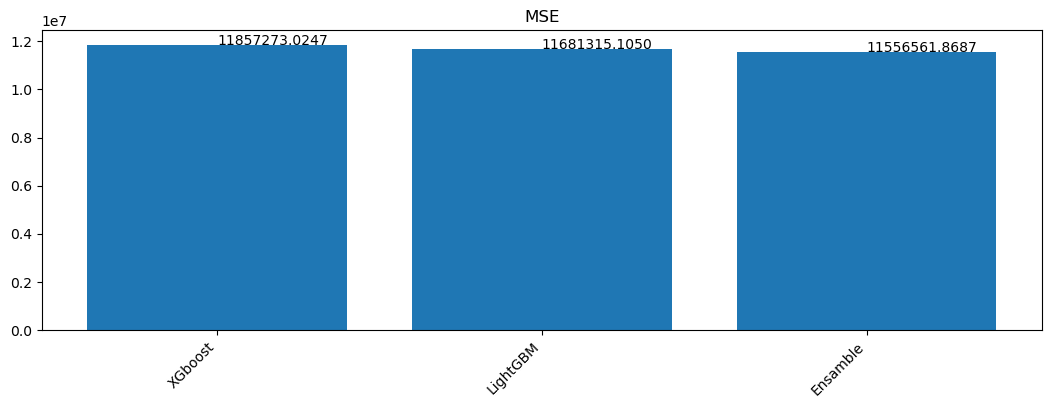

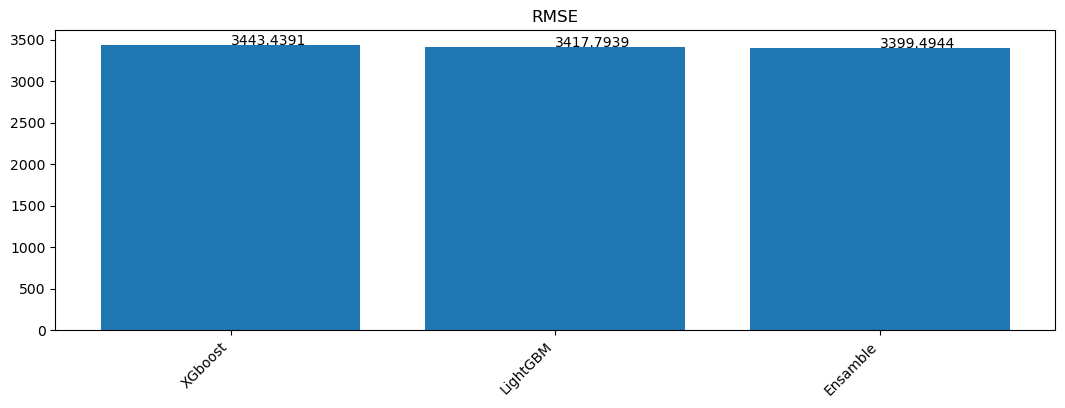

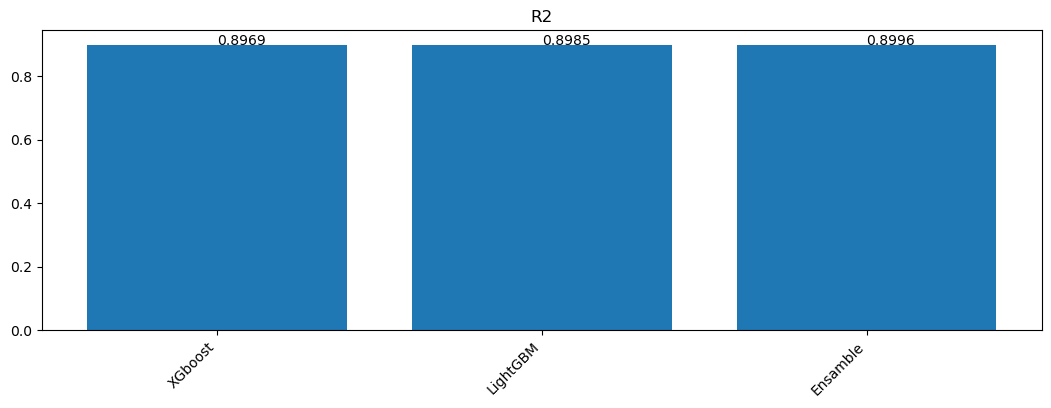

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,3))
ax = fig.add_axes([0,0,1,1])
ax.set_title("MSE")
ejeX = ['XGboost', 'LightGBM', 'Ensamble']
ejeY = [mse, mse_lgb_rfe, mse_stack]
ax.bar(ejeX,ejeY)
def addlabels(x, y, plotP):
    for i in range(len(x)):
        plotP.text(i, y[i], f'{y[i]:.4f}')

addlabels(ejeX, ejeY, plt)
ax.set_xticks(range(len(ejeX)))
ax.set_xticklabels(ejeX, rotation=45, ha='right')
plt.show()

fig = plt.figure(figsize=(10,3))
ax = fig.add_axes([0,0,1,1])
ax.set_title("RMSE")
ejeX = ['XGboost', 'LightGBM', 'Ensamble']
ejeY = [rmse, rmse_lgb_rfe, rmse_stack]
ax.bar(ejeX,ejeY)
def addlabels(x, y, plotP):
    for i in range(len(x)):
        plotP.text(i, y[i], f'{y[i]:.4f}')

addlabels(ejeX, ejeY, plt)
ax.set_xticks(range(len(ejeX)))
ax.set_xticklabels(ejeX, rotation=45, ha='right')
plt.show()

fig = plt.figure(figsize=(10,3))
ax = fig.add_axes([0,0,1,1])
ax.set_title("R2")
ejeX = ['XGboost', 'LightGBM', 'Ensamble']
ejeY = [r2, r2LG, r2_stack]
ax.bar(ejeX,ejeY)
def addlabels(x, y, plotP):
    for i in range(len(x)):
        plotP.text(i, y[i], f'{y[i]:.4f}')

addlabels(ejeX, ejeY, plt)
ax.set_xticks(range(len(ejeX)))
ax.set_xticklabels(ejeX, rotation=45, ha='right')
plt.show()

Basándonos en los resultados el modelo de ensamble (stacking) ha obtenido el mejor rendimiento tanto en términos de MSE (Mean Squared Error), RMSE (Root Mean Squared Error) como R², en comparación con los modelos individuales de XGBoost y LightGBM, algunas consideraciones:


XGBoost mejora el rendimiento en comparacion con los modelos de prueba, esto sugiere que puede capturar mejor la complejidad de los datos y realizar predicciones más precisas.

LightGBM tiene un rendimiento ligeramente mejor que XGBoost, con un RMSE menor y un R² ligeramente mayor. Esto puede deberse a su eficiencia y a la forma en que maneja las características categóricas tras la codificación one-hot.

El modelo de ensamble ha superado a todos los modelos individuales, esto se debe a que el stacking aprovecha las fortalezas de cada modelo base, permitiendo que la regresión lineal como meta-modelo ajuste los pesos finales y realice predicciones que son el promedio ponderado de las predicciones de los modelos base, el resultado es un modelo que generaliza mejor a datos y ofrece predicciones más estables y precisas.


Conclusiones:

El modelo de ensamble proporciona el mejor rendimiento general al combinar las predicciones de múltiples modelos, lo que lleva a un mejor ajuste y una generalización más fuerte, la reducción en RMSE es particularmente significativa, ya que es una métrica que penaliza más los errores grandes, lo que indica que el modelo de ensamble es mejor para manejar las diferencias entre los valores de predicción y los valores reales. El aumento en el R² muestra que el modelo de ensamble puede explicar una mayor proporción de la varianza en los datos de prueba, lo que indica que se ajusta mejor a los datos sin caer en el sobreajuste,
estos resultados demuestran la eficacia de combinar modelos con diferentes fortalezas y patrones de aprendizaje, lo que a menudo puede producir un modelo compuesto que es superior a cualquiera de sus componentes individuales.



RMSE proporciona una medida de la magnitud del error en las mismas unidades que la variable de interés, en este caso, el precio del vehículo, para el mejor modelo(ensamble) la desviacion respecto al precio real es de 3399,49

Un R² cercano a 1 indica que el modelo puede explicar muy bien la variabilidad de los precios de los vehículos basado en las características, en este caso el mejor modelo  (ensamble) 0,8995 que es cercano a 1, y se considera muy bueno (con posibilidad de mejorar)



